In [1]:
!pip install pycausalimpact

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from causalimpact import CausalImpact

#### Obteniendo los datos


In [3]:
import requests

url = "https://www.ssa.gov/oact/babynames/names.zip"

with requests.get(url) as response:

    with open("names.zip", "wb") as temp_file:
        temp_file.write(response.content)

In [4]:
import csv
from zipfile import ZipFile

# This list will hold all our data. We initialize it with the header row.
data_list = [["year", "name", "gender", "count"]]

# We first read the zip file using a zipfile.ZipFile object.
with ZipFile("names.zip") as temp_zip:

    # Then we read the file list.
    for file_name in temp_zip.namelist():

        # We will only process .txt files.
        if ".txt" in file_name:

            # Now we read the current file from the zip file.
            with temp_zip.open(file_name) as temp_file:

                # The file is opened as binary, we decode it using utf-8 so it can be manipulated as a string.
                for line in temp_file.read().decode("utf-8").splitlines():

                    # We prepare our desired data fields and add them to the data list.
                    line_chunks = line.split(",")
                    year = file_name[3:7]
                    name = line_chunks[0]
                    gender = line_chunks[1]
                    count = line_chunks[2]

                    data_list.append([year, name, gender, count])

# We save the data list into a csv file.
csv.writer(open("data.csv", "w", newline="",
                encoding="utf-8")).writerows(data_list)

In [5]:
df = pd.read_csv("data.csv")

In [6]:
df.head(3)

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003


In [7]:
aryaF=df[(df.name=="Arya")&(df.gender=="F")]
aryaF

,year,name,gender,count
992582,1986,Arya,F,5
1035574,1988,Arya,F,5
1081278,1990,Arya,F,6
1130172,1992,Arya,F,7
1230690,1996,Arya,F,11
1256370,1997,Arya,F,13
1280833,1998,Arya,F,25
1310575,1999,Arya,F,16
1336653,2000,Arya,F,34
1366325,2001,Arya,F,36


In [8]:
aryaF=aryaF[aryaF.year>=1996]
aryaF.head(3)

,year,name,gender,count
1230690,1996,Arya,F,11
1256370,1997,Arya,F,13
1280833,1998,Arya,F,25


In [9]:
Jaclyn=df[(df.name=="Jaclyn")&(df.gender=="F")]
Kristie=df[(df.name=="Kristie")&(df.gender=="F")]
Kaley=df[(df.name=="Kaley")&(df.gender=="F")]
Jodi=df[(df.name=="Jodi")&(df.gender=="F")]

Jaclyn=Jaclyn[Jaclyn.year>=1996]
Kristie=Kristie[Kristie.year>=1996]
Kaley=Kaley[Kaley.year>=1996]
Jodi=Jodi[Jodi.year>=1996]

In [10]:
len(aryaF["year"])

24

In [12]:
aryaF.loc[:,"year"]=[str(aryaF["year"].values[i]) + '-01-01' for i in range(0,len(aryaF["year"]))]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [13]:
aryaF.head(2)

,year,name,gender,count
1230690,1996-01-01,Arya,F,11
1256370,1997-01-01,Arya,F,13


In [14]:
data=pd.DataFrame(aryaF["count"].values, columns = ['Arya'],index=pd.to_datetime(aryaF.year,format='%Y-%m-%d'))
data

,Arya
year,
1996-01-01,11
1997-01-01,13
1998-01-01,25
1999-01-01,16
2000-01-01,34
2001-01-01,36
2002-01-01,54
2003-01-01,71
2004-01-01,120


In [15]:
data['Jaclyn']=Jaclyn["count"].values
data['Kristie']=Kristie["count"].values
data['Kaley']=Kaley["count"].values
data['Jodi']=Jodi["count"].values

In [16]:
data.head(2)

,Arya,Jaclyn,Kristie,Kaley,Jodi
year,,,,,
1996-01-01,11,939,169,502,282
1997-01-01,13,772,184,508,258


In [17]:
pre_period = ['19960101','20120101']
post_period = ['20130101','20190101']

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1999.29            13995.0
Prediction (s.d.)         452.78 (49.5)      3169.46 (346.53)
95% CI                    [352.66, 546.72]   [2468.65, 3827.01]

Absolute effect (s.d.)    1546.51 (49.5)     10825.54 (346.53)
95% CI                    [1452.57, 1646.62] [10167.99, 11526.35]

Relative effect (s.d.)    341.56% (10.93%)   341.56% (10.93%)
95% CI                    [320.81%, 363.67%] [320.81%, 363.67%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1999.29. By contrast, in the absence of an
intervention, we would have expected an average response of 452.78.
The 95% interval of this counterfactual prediction is [352.66, 546.72].
Subtracting thi

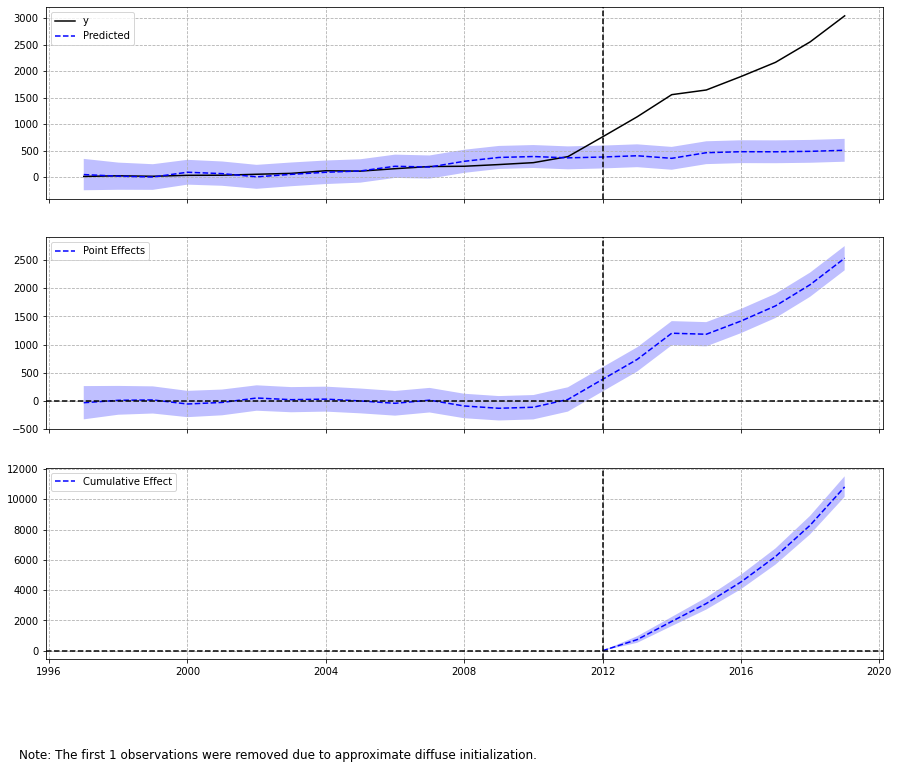

In [18]:
ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()